<a href="https://colab.research.google.com/github/jaitalaakso/Business-Analytics/blob/Classes/UDP_BA_Clase_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

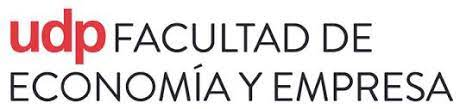



# UDP - Bussines Analytics 1

### Contenido de la clase:

### Data Processing

### Contenido de la clase
* Creación de Variables Dummies
* One Hot Encoding
* Label Encoding
* Target Encoding
* Ejemplo práctico

## Hacia donde vamos...
* Analítica Descriptiva:
  * Preprocessing
    * Missing Values
    * Outliers
    * Feature Engineering
    * Feature Selection
  * Exploratory Data Analysis
    * Análisis Univariado: distribución normal?
    * Test de comparación de médias: t-test, Chi2, KS, etc
    * Regresión Logística

### Instalación de la librería de estadísticas

In [ ]:
# Para instalarla debes sacar el signo #
# ! pip install scipy

In [1]:
# Librerías de tratamiento de datos (las principales)
import pandas as pd
import numpy as np
import missingno as msno


# Librerías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns
# complementa algunas visualizaciones
%matplotlib inline
# apply some cool styling
sns.set(color_codes=True)

# Instalación de librería estadística
from scipy import stats
from scipy.stats import norm


# Librerías de advertencias
import warnings
warnings.filterwarnings("ignore")


### Importamos la data desde nuestro Drive

1. from google.colab import drive
2. drive.mount("/content/drive")
3. Permitir acceso a nuestro Google Colab
4. link archivo


In [2]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/BA1/Control2/data_store.csv",sep=",",encoding="latin-1")

# # To display the top 5 rows
# df.head(5)

Mounted at /content/drive


In [ ]:
# Data Local
# df = pd.read_csv("/Users/franciscoletelier/Dropbox (Personal)/UDP/UDP_BA/data_store.csv",sep=",",encoding="latin-1")
# df.sample(10)



# Data desde Github
# df = pd.read_csv("data_store.csv",sep=",",encoding="latin-1")
# df.sample(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5950,5951,CA-2017-161046,3/5/2017,3/5/2017,Same Day,CB-12535,Claudia Bergmann,Corporate,United States,Southaven,...,38671,South,OFF-AP-10000891,Office Supplies,Appliances,Kensington 7 Outlet MasterPiece HOMEOFFICE Pow...,262.240,2,0.0,78.6720
6822,6823,US-2017-115609,11/2/2017,11/7/2017,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Los Angeles,...,90036,West,OFF-AP-10003040,Office Supplies,Appliances,Fellowes 8 Outlet Superior Workstation Surge P...,168.100,5,0.0,43.7060
8185,8186,CA-2015-136728,9/13/2015,9/17/2015,Second Class,AG-10900,Arthur Gainer,Consumer,United States,Chicago,...,60623,Central,OFF-EN-10002621,Office Supplies,Envelopes,Staple envelope,7.824,1,0.2,2.9340
1310,1311,CA-2016-141397,6/20/2016,6/21/2016,First Class,RC-19825,Roy Collins,Consumer,United States,Pasadena,...,91104,West,FUR-CH-10003846,Furniture,Chairs,Hon Valutask Swivel Chairs,161.568,2,0.2,-8.0784
9835,9836,CA-2016-126627,10/10/2016,10/12/2016,First Class,WB-21850,William Brown,Consumer,United States,La Porte,...,77571,Central,OFF-BI-10001597,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",16.392,2,0.8,-26.2272
2536,2537,CA-2015-168746,1/27/2015,1/29/2015,Second Class,SV-20365,Seth Vernon,Consumer,United States,Cleveland,...,44105,East,FUR-CH-10000513,Furniture,Chairs,High-Back Leather Manager's Chair,181.986,2,0.3,-54.5958
2623,2624,CA-2017-127180,10/22/2017,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
32,33,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,OFF-BI-10001525,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",6.858,6,0.7,-5.7150
7262,7263,CA-2017-156363,10/22/2017,10/28/2017,Standard Class,ML-17395,Marina Lichtenstein,Corporate,United States,Philadelphia,...,19134,East,TEC-PH-10003988,Technology,Phones,"LF Elite 3D Dazzle Designer Hard Case Cover, L...",32.700,5,0.4,-6.5400
8848,8849,CA-2015-140718,7/2/2015,7/4/2015,First Class,FA-14230,Frank Atkinson,Corporate,United States,Raleigh,...,27604,South,TEC-PH-10003505,Technology,Phones,Geemarc AmpliPOWER60,74.240,1,0.2,8.3520


# Prepocesamiento de la data
## Variable Objetivo: Profit

### Eliminación de columnas innecesarías

In [3]:
# Se eliminan las columnas que no se usarán (drop)
df = df.drop(['Customer ID','Customer Name', 'Order ID', 'Country', 'Postal Code', 'Product ID'],axis=1)
df.head(5)

,Row ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,6/12/2016,6/16/2016,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<Axes: >

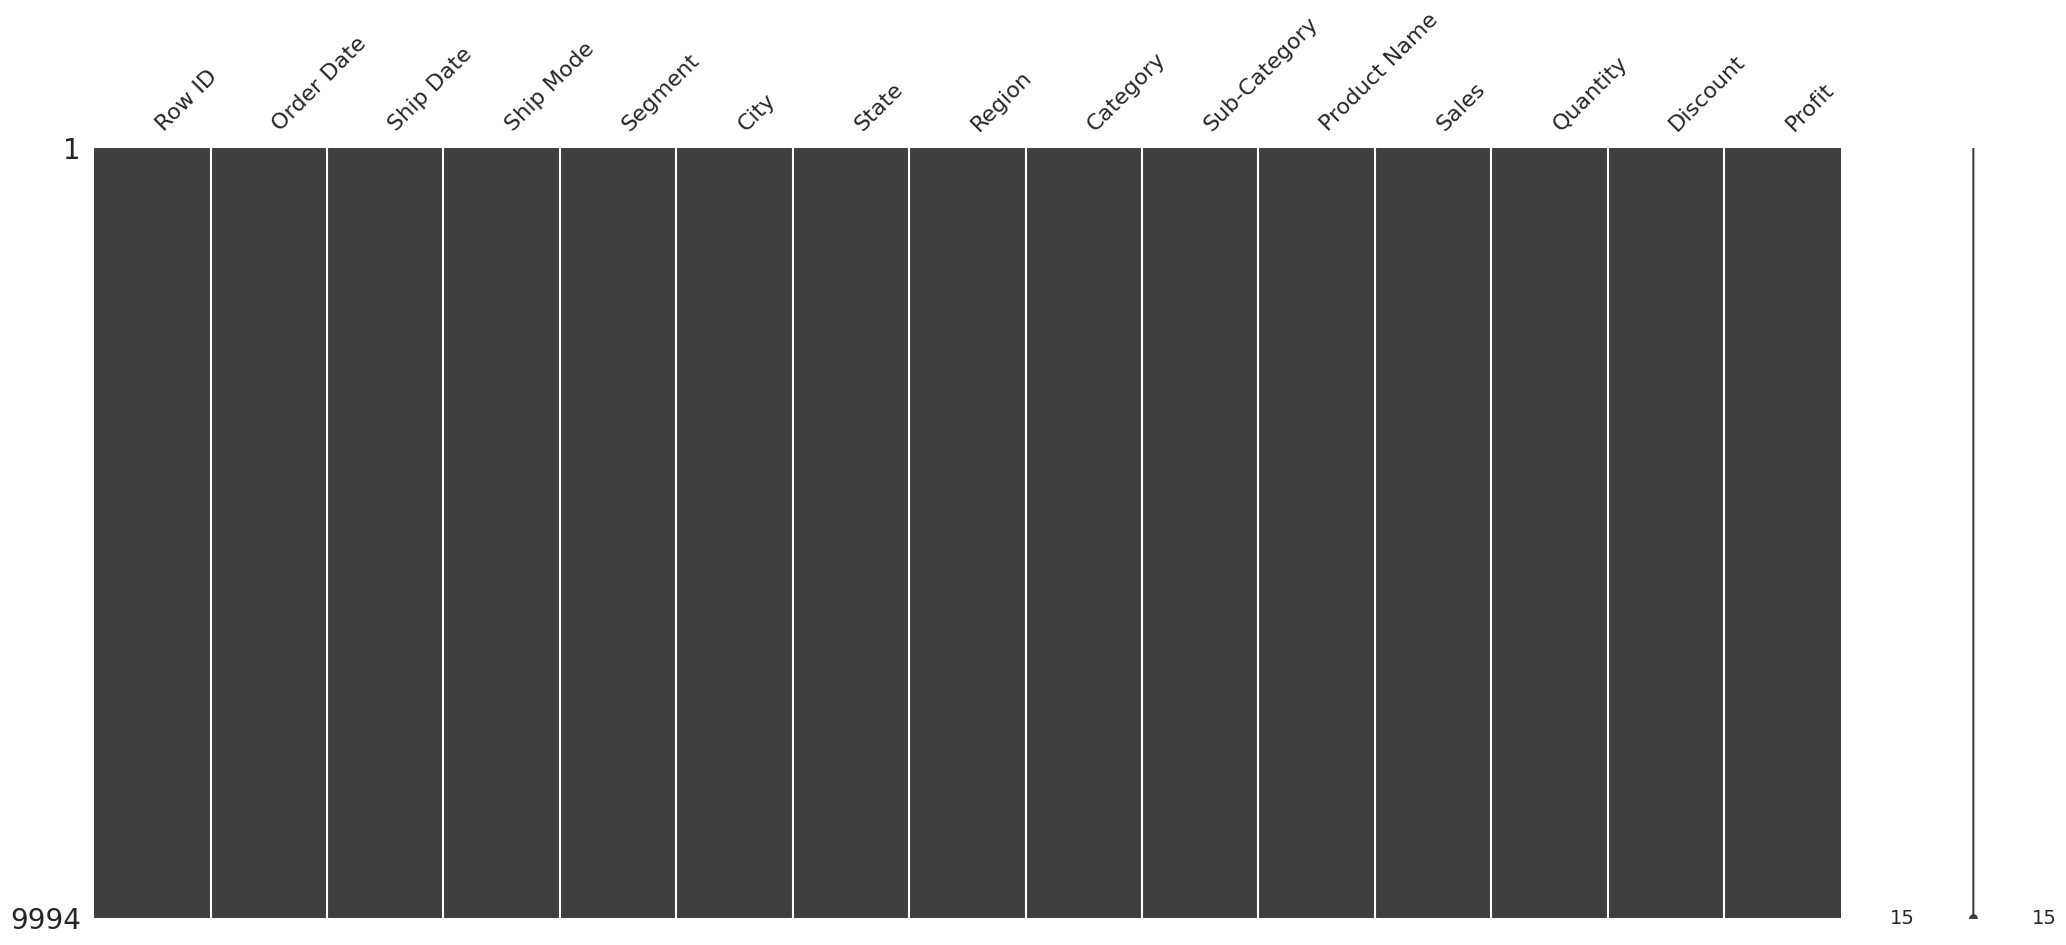

In [4]:
msno.matrix(df)

# Creación de Variables Dummy

### Creación de variables dummy para la variable categorica: Ship Mode

In [5]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [6]:
# Simplificamos las respuestas de la columna Ship Mode
df['Ship Mode'] = df['Ship Mode'].replace(['Standard Class','Second Class','First Class','Same Day'],['Standard','Second','First','Express'])

In [7]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [8]:
# Simplificamos las respuestas de la columna Segment
df['Segment'] = df['Segment'].replace(['Consumer','Corporate','Home Office'],['Consumidor','Corporativo','Oficina'])

### Creamun subset de trabajo para los ejemplos

In [9]:
subset = df[['Ship Mode','Segment','Profit']]
subset.head(5)

,Ship Mode,Segment,Profit
0,Second,Consumidor,41.9136
1,Second,Consumidor,219.5820
2,Second,Corporativo,6.8714
3,Standard,Consumidor,-383.0310
4,Standard,Consumidor,2.5164


### One Hot Encoding

* One Hot Encoding es un proceso mediante el cual se crea una variable dummy por cada categoría de la variable categórica.
* Es decir, si tenemos una variable categórica con 3 categorías, se crearán 3 variables dummy.
* La variable dummy toma el valor de 1 si la observación pertenece a esa categoría, y 0 si no pertenece a esa categoría.
* Es importante eliminar una de las variables dummy creadas, ya que si no se hace, se puede caer en el problema de multicolinealidad.
* Consultar la librería de pandas para crear variables dummy: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
* Consultar la librería de sklearn para crear variables dummy: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [10]:
# Desarrollaremos el ejemplo con la columna Ship Mode con la librería Pandas: pandas.get_dummies()

# Se crea una nueva columna para cada valor de la columna Ship Mode
tmp_dummy = pd.get_dummies(subset['Ship Mode'])

tmp_dummy.head(5)

,Express,First,Second,Standard
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1


In [11]:
# Se agrega la columna Ship Mode al dataframe
subset = pd.concat([subset,tmp_dummy],axis=1)

subset.head(5)


,Ship Mode,Segment,Profit,Express,First,Second,Standard
0,Second,Consumidor,41.9136,0,0,1,0
1,Second,Consumidor,219.5820,0,0,1,0
2,Second,Corporativo,6.8714,0,0,1,0
3,Standard,Consumidor,-383.0310,0,0,0,1
4,Standard,Consumidor,2.5164,0,0,0,1


### Para evitar multicolinealidad, debemos dropear la columna de referencia

In [12]:
# Eliminamos la columna Ship Mode
subset = subset.drop(['Ship Mode'],axis=1)
subset.head(5)

,Segment,Profit,Express,First,Second,Standard
0,Consumidor,41.9136,0,0,1,0
1,Consumidor,219.5820,0,0,1,0
2,Corporativo,6.8714,0,0,1,0
3,Consumidor,-383.0310,0,0,0,1
4,Consumidor,2.5164,0,0,0,1


### Desarrollaremos el ejemplo con la columna Segment con la librería Sklearn: sklearn.preprocessing.OneHotEncoder()

In [13]:
# Se importa la librería
from sklearn.preprocessing import OneHotEncoder

In [14]:
subset.Segment.unique()

array(['Consumidor', 'Corporativo', 'Oficina'], dtype=object)

In [15]:
# Se crea el objeto
ohe = OneHotEncoder()

# Se aplica el objeto a la columna Segment
tmp_ohe = pd.DataFrame(ohe.fit_transform(subset[['Segment']]).toarray())

# Se agrega el nombre de las columnas
tmp_ohe.columns = ['Consumidor', 'Corporativo', 'Oficina']

tmp_ohe.head(5)


,Consumidor,Corporativo,Oficina
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [16]:
# Se agrega la columna tmp_ohe al dataframe
subset = pd.concat([subset,tmp_ohe],axis=1)
subset.head(5)

,Segment,Profit,Express,First,Second,Standard,Consumidor,Corporativo,Oficina
0,Consumidor,41.9136,0,0,1,0,1.0,0.0,0.0
1,Consumidor,219.5820,0,0,1,0,1.0,0.0,0.0
2,Corporativo,6.8714,0,0,1,0,0.0,1.0,0.0
3,Consumidor,-383.0310,0,0,0,1,1.0,0.0,0.0
4,Consumidor,2.5164,0,0,0,1,1.0,0.0,0.0


In [17]:
# Se eliminan las columnas que no se usarán (drop)
subset = subset.drop(['Segment'],axis=1)
subset.head(5)

,Profit,Express,First,Second,Standard,Consumidor,Corporativo,Oficina
0,41.9136,0,0,1,0,1.0,0.0,0.0
1,219.5820,0,0,1,0,1.0,0.0,0.0
2,6.8714,0,0,1,0,0.0,1.0,0.0
3,-383.0310,0,0,0,1,1.0,0.0,0.0
4,2.5164,0,0,0,1,1.0,0.0,0.0


# Crearemos una variable categorica para clasificar la variable Profit en 2 categorías
* Profit > 0: 1
* Profit <= 0: 0

In [18]:
# Se crea la variable categorica para la columna Profit con las siguientes condiciones
# Profit > 0 : Ganancia
# Profit <= 0 : Perdida

subset['Profit_cat'] = np.where(subset['Profit'] > 0, 'Ganancia', 'Perdida')
subset.head(5)

,Profit,Express,First,Second,Standard,Consumidor,Corporativo,Oficina,Profit_cat
0,41.9136,0,0,1,0,1.0,0.0,0.0,Ganancia
1,219.5820,0,0,1,0,1.0,0.0,0.0,Ganancia
2,6.8714,0,0,1,0,0.0,1.0,0.0,Ganancia
3,-383.0310,0,0,0,1,1.0,0.0,0.0,Perdida
4,2.5164,0,0,0,1,1.0,0.0,0.0,Ganancia


# Label Encoding
* Label Encoding es un proceso mediante el cual se asigna un número a cada categoría de la variable categórica.
* Es decir, si tenemos una variable categórica con 3 categorías, se asignarán los números 1, 2 y 3 a cada categoría.
* Es importante tener en cuenta que no se debe usar Label Encoding cuando se trabaja con algoritmos de Machine Learning basados en distancias, como KNN o K-Means.
* Consultar la librería de pandas para crear variables dummy: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
* Consultar la librería de sklearn para crear variables dummy: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [19]:
subset.describe()

,Profit,Express,First,Second,Standard,Consumidor,Corporativo,Oficina
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,28.656896,0.054333,0.153892,0.194617,0.597158,0.519412,0.302181,0.178407
std,234.260108,0.226684,0.360864,0.395925,0.490494,0.499648,0.459226,0.382874
min,-6599.978000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.728750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.666500,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,29.364000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,8399.976000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# Aplicamos label encoder a la columna Profit_cat
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
subset['Profit_cat'] = le.fit_transform(subset['Profit_cat'])
subset.head(5)

,Profit,Express,First,Second,Standard,Consumidor,Corporativo,Oficina,Profit_cat
0,41.9136,0,0,1,0,1.0,0.0,0.0,0
1,219.5820,0,0,1,0,1.0,0.0,0.0,0
2,6.8714,0,0,1,0,0.0,1.0,0.0,0
3,-383.0310,0,0,0,1,1.0,0.0,0.0,1
4,2.5164,0,0,0,1,1.0,0.0,0.0,0


In [21]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Profit       9994 non-null   float64
 1   Express      9994 non-null   uint8  
 2   First        9994 non-null   uint8  
 3   Second       9994 non-null   uint8  
 4   Standard     9994 non-null   uint8  
 5   Consumidor   9994 non-null   float64
 6   Corporativo  9994 non-null   float64
 7   Oficina      9994 non-null   float64
 8   Profit_cat   9994 non-null   int64  
dtypes: float64(4), int64(1), uint8(4)
memory usage: 429.6 KB


# Aplicamos nuestras transformaciones a la data en una regresión logística

In [22]:
# Aplicamos una regresión logistica para predecir el valor de la columna Profit_cat
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [23]:
X = subset.drop('Profit_cat', axis=1)  # Features (todas las columnas excepto la variable objetivo)
y = subset['Profit_cat']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [24]:
accuracy = accuracy_score(y_test, y_pred)

accuracy

1.0

In [25]:
score = model.score(X_test, y_test)
score

1.0

In [26]:
precision_recall_fscore_support(y_test, y_pred)

(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([3238,  760]))

In [27]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[3238,    0],
       [   0,  760]])